## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

In [2]:
import pandas as pd

In [3]:
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [52]:
df=pd.read_csv('Datasets/Task2.csv')
df2=pd.read_csv('Datasets/Task1.csv')


##Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


# Tasks

## 1. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [10]:
df.describe()

,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
count,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,62772.000000,62772.000000
mean,14.043113,74.278531,288.353877,49.316135,13.981737,70.706601,70.048451
std,13.488906,107.452022,470.013224,85.352525,13.454922,10.588384,11.966725
min,0.000000,0.000000,0.000000,0.000000,0.000000,49.381346,46.723235
25%,3.000000,9.000000,27.700000,3.000000,3.000000,63.142591,60.712805
50%,10.000000,29.000000,95.700000,12.200000,10.000000,68.894790,68.247303
75%,21.000000,95.000000,336.600000,53.500000,21.000000,76.250975,77.043739
max,138.000000,1359.000000,9989.400000,1173.900000,138.000000,120.140593,134.484139


In [11]:
df.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246


In [12]:
df.tail()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
66634,Riyadh,2023-12-15 03:01:30,8,33,127.8,20.4,8,63.926569,63.245473
66635,Riyadh,2023-12-15 04:31:30,6,27,87.0,13.8,5,59.182641,60.012955
66636,Riyadh,2023-12-15 05:01:30,3,17,49.8,6.7,1,57.746816,57.561438
66637,Riyadh,2023-12-15 06:01:30,0,16,61.3,4.3,0,56.535277,55.463218
66638,Riyadh,2023-12-15 07:01:30,0,15,39.5,5.2,0,56.126417,54.886055


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66639 entries, 0 to 66638
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 66639 non-null  object 
 1   Datetime             66639 non-null  object 
 2   TrafficIndexLive     66639 non-null  int64  
 3   JamsCount            66639 non-null  int64  
 4   JamsDelay            66639 non-null  float64
 5   JamsLength           66639 non-null  float64
 6   TrafficIndexWeekAgo  66639 non-null  int64  
 7   TravelTimeHistoric   62772 non-null  float64
 8   TravelTimeLive       62772 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 4.6+ MB


### Identify and analyze patterns in the data.

In [15]:
df['TrafficIndexLive'].unique()

array([  6,   7,   8,   5,  10,  13,   3,   2,  12,   9,  11,  14,   4,
         1,  16,  20,  19,  15,  18,  17,  22,  23,  21,  24,  25,  26,
        29,  28,  30,  27,  32,  31,  34,  36,  35,  33,  37,  40,  58,
        72,  56,  38,   0,  39,  49,  52,  46,  41,  42,  45,  44,  48,
        43,  50,  47,  60,  59,  51,  53,  57,  55,  61,  70,  68,  54,
        82,  91,  74,  67,  64,  65,  66,  62,  98, 104, 106,  93,  76,
        69,  63,  71,  73,  80,  83,  75, 115, 138, 136, 107,  78,  79,
        77,  89,  88,  85,  81,  99,  96,  90,  94,  84,  95])

### Visualize the distribution of key variables (e.g., Traffic_Index, Date).

In [17]:
#plt.figure(figsize=(8,6))
#sns.histplot(df, bins=20, kde=True)
#plt.title('Distribution')
#plt.xlabel('Value')
#plt.ylabel('Frequency')
#plt.show()


<Axes: ylabel='Frequency'>

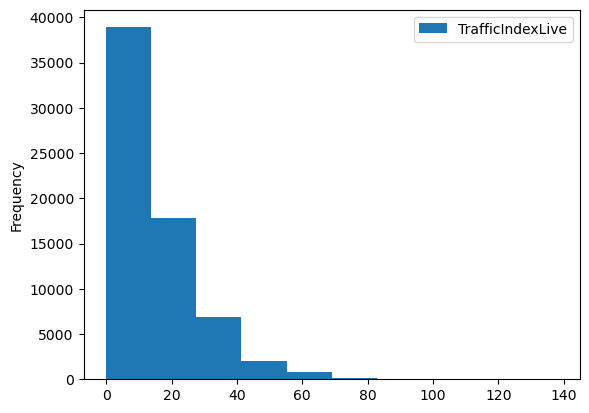

In [70]:
#df.plot.scatter(x='TrafficIndexLive', y ='Datetime' )
#(df[['TrafficIndexLive' , 'Datetime']].value_counts().head()/ len(df)).plot.bar()
df[['TrafficIndexLive' , 'Datetime']].plot.hist()

### Explore relationships between variables (e.g., Traffic_Index vs. Weather_Condition).


In [20]:
df.columns

Index(['City', 'Datetime', 'TrafficIndexLive', 'JamsCount', 'JamsDelay',
       'JamsLength', 'TrafficIndexWeekAgo', 'TravelTimeHistoric',
       'TravelTimeLive'],
      dtype='object')

In [60]:
column_to_merge = df2[['Weather_conditions']]

In [62]:
df= pd.concat([df ,column_to_merge])

In [64]:
df.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,Weather_conditions
0,Abudhabi,2023-07-07 08:01:30,6.0,4.0,15.6,0.7,13.0,59.611918,54.803617,NaN
1,Abudhabi,2023-07-07 09:01:30,7.0,7.0,20.5,1.7,8.0,60.221387,56.118629,NaN
2,Abudhabi,2023-07-07 10:46:30,7.0,8.0,25.0,2.8,6.0,59.161978,55.518834,NaN
3,Abudhabi,2023-07-07 11:16:30,8.0,11.0,30.6,5.5,6.0,59.738138,56.413917,NaN
4,Abudhabi,2023-07-07 12:01:30,8.0,20.0,62.1,6.5,5.0,58.958314,56.059246,NaN


## 2. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


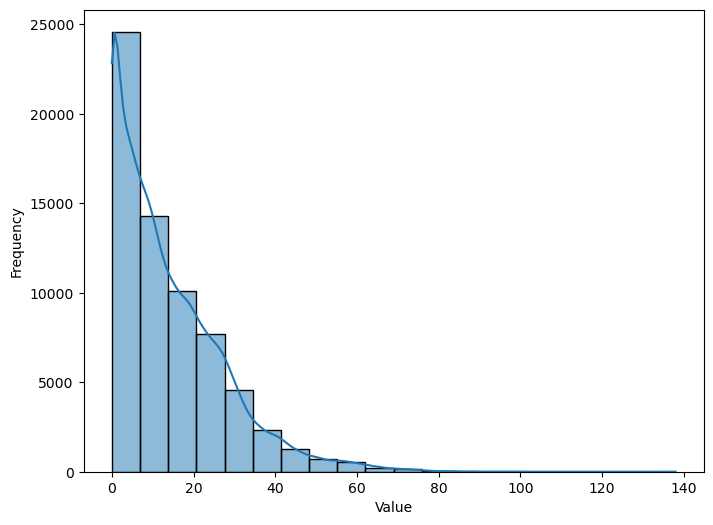

In [50]:
plt.figure(figsize=(8,6))
sns.histplot(df['TrafficIndexLive'], bins=20, kde=True)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

In [ ]:
df2 = df[['TravelTimeLive','TravelTimeHistoric','JamsDelay','JamsCount']]
df2.corr()


<Axes: xlabel='TrafficIndexLive', ylabel='TrafficIndexWeekAgo'>

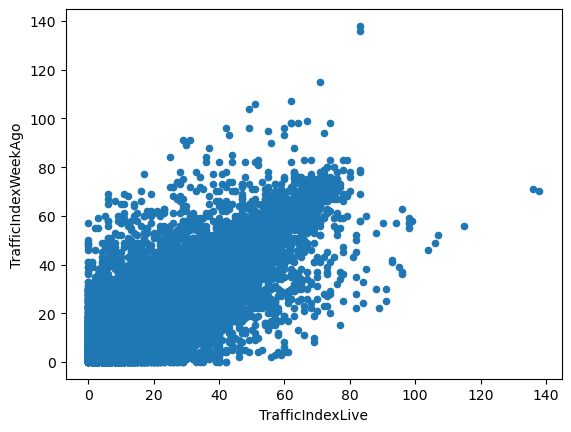

In [48]:
df.plot.scatter(x='TrafficIndexLive',y= 'TrafficIndexWeekAgo')

## 3. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>